In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# df = pd.concat([train,test],0)
train.drop('ID',1,inplace=True)
# test

In [3]:
train.rename(columns={'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [4]:
cat_cols = train.select_dtypes('object').columns
num_cols = train.select_dtypes('number').columns
num_cols,cat_cols=list(num_cols),list(cat_cols)
num_cols.remove('Claim')
num_cols,cat_cols

(['Duration', 'Net_Sales', 'Commision', 'Age'],
 ['Agency',
  'Agency_Type',
  'Distribution_Channel',
  'Product_Name',
  'Destination'])

In [5]:
train.describe()
train.Claim.value_counts(normalize=True)

,Duration,Net_Sales,Commision,Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.256108,48.554673,12.219963,39.555725,0.166699
std,109.138708,60.198589,22.847645,13.762473,0.372710
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000,0.000000
50%,24.000000,29.500000,0.000000,36.000000,0.000000
75%,57.000000,55.000000,13.380000,43.000000,0.000000
max,4881.000000,682.000000,262.760000,118.000000,1.000000


0    0.833301
1    0.166699
Name: Claim, dtype: float64

In [6]:
train[cat_cols]
train[num_cols]

,Agency,Agency_Type,Distribution_Channel,Product_Name,Destination
0,EPX,Travel Agency,Online,Cancellation Plan,PHILIPPINES
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,THAILAND
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,HONG KONG
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,MALAYSIA
...,...,...,...,...,...
52305,C2B,Airlines,Online,Annual Gold Plan,SINGAPORE
52306,RAB,Airlines,Online,Value Plan,BRUNEI DARUSSALAM
52307,C2B,Airlines,Online,Bronze Plan,SINGAPORE
52308,EPX,Travel Agency,Online,Cancellation Plan,THAILAND


,Duration,Net_Sales,Commision,Age
0,61,12.000000,0.0000,41
1,4,17.000000,0.0000,35
2,26,19.800000,11.8800,47
3,15,27.000000,0.0000,48
4,15,37.000000,0.0000,36
...,...,...,...,...
52305,365,444.750593,111.1858,40
52306,8,23.000000,9.2000,54
52307,38,61.100000,15.2800,37
52308,2,10.000000,0.0000,46


In [7]:
# neg_dur_indices = list(train.Duration[train.Duration<0].index)
# train.drop(neg_dur_indices,inplace=True)
for i in cat_cols:
    train[i].value_counts()

EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

Travel Agency    34996
Airlines         17314
Name: Agency_Type, dtype: int64

Online     51419
Offline      891
Name: Distribution_Channel, dtype: int64

Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

SINGAPORE       14242
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BERMUDA             2
BHUTAN              2
BELARUS             2
ZAMBIA              1
TURKMENISTAN        1
Name: Destination, Length: 97, dtype: int64

In [8]:
# def category(x):
#     if 'Comprehensive' in x:
#         return 0
#     elif 'Travel' in x or 'Trip' in x or 'Ticket' in x or 'Vehicle' in x or 'Protect' in x:
#         return 1
#     elif 'Plan' in x:
#         return 2
#     else:
#         return 3

# train.Product_Name = train.Product_Name.apply(lambda x:category(x))
# train.Product_Name.value_counts()

In [9]:
for i in cat_cols:
    train[i].unique()

##EDA Plots    
# fig, axs = plt.subplots(5,1,figsize=(10,40))
# for j,i in enumerate(num_cols):
#     axs[j].boxplot(train[i])
#     axs[j].set_title(i)

# f,ax=plt.subplots(4,1,figsize=(8,30))
# for j,i in enumerate(num_cols):
#     ax[j].hist(train[i])
#     ax[j].set_title(i)

# f,ax = plt.subplots(5,1,figsize=(8,40))
# sns.countplot(train.Claim,ax=ax[0])
# sns.countplot(train.Distribution_Channel,ax=ax[1])
# sns.countplot(train.Claim,hue=train.Distribution_Channel,ax=ax[2])
# sns.countplot(train.Agency_Type,ax=ax[3])
# sns.countplot(train.Claim,hue=train.Agency_Type,ax=ax[4])

array(['EPX', 'CWT', 'JZI', 'C2B', 'RAB', 'TST', 'CSR', 'JWT', 'LWC',
       'SSI', 'ART', 'CCR', 'KML', 'ADM', 'CBH', 'TTW'], dtype=object)

array(['Travel Agency', 'Airlines'], dtype=object)

array(['Online', 'Offline'], dtype=object)

array(['Cancellation Plan', 'Rental Vehicle Excess Insurance',
       '2 way Comprehensive Plan', 'Basic Plan', 'Bronze Plan',
       'Silver Plan', '1 way Comprehensive Plan', 'Value Plan',
       'Annual Silver Plan', 'Travel Cruise Protect',
       'Comprehensive Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Gold',
       'Single Trip Travel Protect Silver', 'Ticket Protector',
       '24 Protect', 'Gold Plan', 'Annual Travel Protect Gold',
       'Annual Travel Protect Platinum',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Silver', 'Premier Plan',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan', 'Child Comprehensive Plan'],
      dtype=object)

array(['PHILIPPINES', 'MALAYSIA', 'THAILAND', 'HONG KONG',
       'UNITED KINGDOM', 'VIET NAM', 'CHINA', 'SINGAPORE', 'JAPAN',
       'INDONESIA', 'UNITED ARAB EMIRATES', 'BRUNEI DARUSSALAM',
       'UNITED STATES', 'CANADA', 'INDIA', 'KOREA, REPUBLIC OF',
       'CAMBODIA', 'AUSTRALIA', 'MONGOLIA', 'SOUTH AFRICA', 'EGYPT',
       'CZECH REPUBLIC', 'GERMANY', 'NEPAL', 'PAKISTAN', 'FRANCE',
       'MYANMAR', 'TAIWAN, PROVINCE OF CHINA', 'SPAIN', 'NEW ZEALAND',
       'ISRAEL', 'NETHERLANDS', 'NORWAY', 'SRI LANKA', 'FINLAND',
       'IRELAND', 'ITALY', 'ICELAND', 'DENMARK', 'SAUDI ARABIA',
       'SWITZERLAND', 'MACAO', 'UKRAINE', 'PORTUGAL', 'BELGIUM',
       'HUNGARY', 'GREECE', 'MALDIVES',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'MOROCCO', 'KAZAKHSTAN',
       'TURKEY', 'MAURITIUS', 'BANGLADESH', 'PERU', 'SWEDEN', 'KENYA',
       'FIJI', 'CYPRUS', 'BRAZIL', 'RUSSIAN FEDERATION', 'MEXICO',
       'AUSTRIA', 'TANZANIA, UNITED REPUBLIC OF', 'LEBANON', 'POLAND',
       'ROMANIA', 'SLOV

In [10]:
# import pycountry_convert as pc
# def country_to_continent(x):
#     if " " not in x:
#         x=x[0]+x[1:].lower()
#     else:
#         pos = [i for i,j in enumerate(x) if ' '==j]
#         pos = np.array(pos)+1
#         x=x.lower()
#         x=x[0].upper()+x[1:]
#         for j in pos:
#             x = x[:j]+x[j].upper()+x[j+1:]
#     country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
#     continent_name = pc.country_alpha2_to_continent_code(country_code)
#     return continent_name

# train.Destination = train.Destination.apply(lambda x: 'CHINA' if x=='TAIWAN, PROVINCE OF CHINA' else x)
# train.Destination = train.Destination.apply(lambda x:country_to_continent(x))

In [11]:
pd.crosstab(train.Claim,train.Destination,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab(train.Claim,train.Agency,margins=True).style.background_gradient(cmap='summer_r')
pd.crosstab(train.Claim,train.Product_Name,margins=True).style.background_gradient(cmap='summer_r')

Destination,ARGENTINA,AUSTRALIA,AUSTRIA,AZERBAIJAN,BAHRAIN,BANGLADESH,BELARUS,BELGIUM,BERMUDA,BHUTAN,BOLIVIA,BRAZIL,BRUNEI DARUSSALAM,CAMBODIA,CANADA,CHILE,CHINA,COLOMBIA,COSTA RICA,CROATIA,CYPRUS,CZECH REPUBLIC,DENMARK,EGYPT,ESTONIA,ETHIOPIA,FIJI,FINLAND,FRANCE,GEORGIA,GERMANY,GREECE,GUAM,HONG KONG,HUNGARY,ICELAND,INDIA,INDONESIA,IRELAND,ISRAEL,ITALY,JAPAN,JORDAN,KAZAKHSTAN,KENYA,"KOREA, REPUBLIC OF",KUWAIT,KYRGYZSTAN,LAO PEOPLE'S DEMOCRATIC REPUBLIC,LEBANON,LITHUANIA,LUXEMBOURG,MACAO,MALAYSIA,MALDIVES,MALTA,MAURITIUS,MEXICO,MONGOLIA,MOROCCO,MYANMAR,NEPAL,NETHERLANDS,NEW ZEALAND,NORWAY,OMAN,PAKISTAN,PERU,PHILIPPINES,POLAND,PORTUGAL,QATAR,ROMANIA,RUSSIAN FEDERATION,SAUDI ARABIA,SINGAPORE,SLOVENIA,SOUTH AFRICA,SPAIN,SRI LANKA,SWEDEN,SWITZERLAND,"TAIWAN, PROVINCE OF CHINA","TANZANIA, UNITED REPUBLIC OF",THAILAND,TUNISIA,TURKEY,TURKMENISTAN,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,ZAMBIA,All
Claim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,2556,66,6,10,66,2,32,2,2,5,24,563,359,379,7,3267,9,3,36,12,48,76,17,7,3,9,62,328,7,305,68,5,1661,15,79,1562,2418,89,27,334,1471,9,10,12,1025,5,4,105,3,3,8,71,4198,19,10,9,27,26,11,590,87,249,371,119,9,19,69,1712,25,67,10,14,51,44,8936,7,102,230,175,40,182,739,13,4104,4,51,1,9,211,902,1752,8,3,4,1117,1,43590
1,1,455,0,0,0,0,0,0,0,0,0,0,2,1,14,0,642,0,1,0,0,1,0,0,0,0,0,1,6,0,19,1,0,114,0,3,34,98,0,1,74,140,0,0,0,127,0,0,0,0,0,0,1,161,0,0,0,0,0,0,1,41,54,13,1,0,0,0,85,0,0,0,0,0,0,5306,0,51,37,0,0,4,85,0,458,0,11,0,0,2,142,444,0,0,0,88,0,8720
All,12,3011,66,6,10,66,2,32,2,2,5,24,565,360,393,7,3909,9,4,36,12,49,76,17,7,3,9,63,334,7,324,69,5,1775,15,82,1596,2516,89,28,408,1611,9,10,12,1152,5,4,105,3,3,8,72,4359,19,10,9,27,26,11,591,128,303,384,120,9,19,69,1797,25,67,10,14,51,44,14242,7,153,267,175,40,186,824,13,4562,4,62,1,9,213,1044,2196,8,3,4,1205,1,52310


Agency,ADM,ART,C2B,CBH,CCR,CSR,CWT,EPX,JWT,JZI,KML,LWC,RAB,SSI,TST,TTW,All
Claim,,,,,,,,,,,,,,,,,
0,56,223,5438,75,146,59,5965,24338,519,4363,266,454,526,723,373,66,43590
1,0,0,5177,1,10,1,848,1880,31,256,47,352,1,57,21,38,8720
All,56,223,10615,76,156,60,6813,26218,550,4619,313,806,527,780,394,104,52310


Product_Name,1 way Comprehensive Plan,2 way Comprehensive Plan,24 Protect,Annual Gold Plan,Annual Silver Plan,Annual Travel Protect Gold,Annual Travel Protect Platinum,Annual Travel Protect Silver,Basic Plan,Bronze Plan,Cancellation Plan,Child Comprehensive Plan,Comprehensive Plan,Gold Plan,Individual Comprehensive Plan,Premier Plan,Rental Vehicle Excess Insurance,Silver Plan,Single Trip Travel Protect Gold,Single Trip Travel Protect Platinum,Single Trip Travel Protect Silver,Spouse or Parents Comprehensive Plan,Ticket Protector,Travel Cruise Protect,Value Plan,All
Claim,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2341,9098,165,123,897,63,36,61,3796,2703,12899,8,266,237,47,139,5965,1478,130,50,114,11,723,373,1867,43590
1,68,1457,0,172,1451,120,14,31,246,2020,355,0,12,143,37,2,848,1384,121,50,16,1,57,21,94,8720
All,2409,10555,165,295,2348,183,50,92,4042,4723,13254,8,278,380,84,141,6813,2862,251,100,130,12,780,394,1961,52310


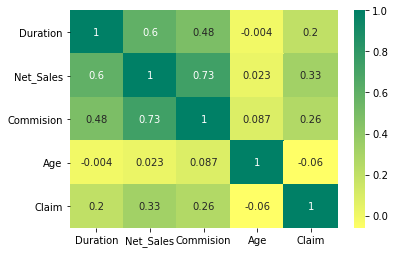

In [12]:
sns.heatmap(train.corr(),annot=True,cmap='summer_r')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve,precision_score
from sklearn.preprocessing import StandardScaler, Normalizer,LabelEncoder
from xgboost import XGBClassifier

In [14]:
train.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [15]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [16]:
cat_cols

['Agency',
 'Agency_Type',
 'Distribution_Channel',
 'Product_Name',
 'Destination']

In [21]:
lr=LabelEncoder()
for i in train.columns:
    train[i] = lr.fit_transform(train[i])
    #test[i] = lr.transform(test[i])

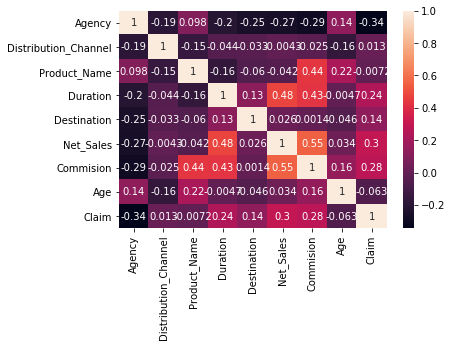

In [24]:
sns.heatmap(train.corr(),annot=True)

In [22]:
train
X=train.drop('Claim',1)
y=train.Claim

,Agency,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,7,1,10,63,68,472,0,40,0
1,7,1,10,6,53,741,0,34,0
2,6,1,16,28,84,1013,2149,46,0
3,7,1,1,17,33,1915,0,47,0
4,7,1,1,17,53,2915,0,35,0
...,...,...,...,...,...,...,...,...,...
52305,2,1,3,333,75,6679,4977,39,1
52306,12,1,24,10,12,1444,1733,53,0
52307,2,1,9,40,75,4377,2674,36,0
52308,7,1,10,4,84,401,0,45,0


In [37]:
X
y

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,7,1,1,10,61,68,12.000000,0.0000,41
1,7,1,1,10,4,53,17.000000,0.0000,35
2,6,1,1,16,26,84,19.800000,11.8800,47
3,7,1,1,1,15,33,27.000000,0.0000,48
4,7,1,1,1,15,53,37.000000,0.0000,36
...,...,...,...,...,...,...,...,...,...
52305,2,0,1,3,365,75,444.750593,111.1858,40
52306,12,0,1,24,8,12,23.000000,9.2000,54
52307,2,0,1,9,38,75,61.100000,15.2800,37
52308,7,1,1,10,2,84,10.000000,0.0000,46


0        0
1        0
2        0
3        0
4        0
        ..
52305    1
52306    0
52307    0
52308    0
52309    0
Name: Claim, Length: 52310, dtype: int64

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
# #LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# lr.score(X_test,y_test)
# confusion_matrix(y_test,y_pred)
# precision_score(y_test,y_pred)

In [40]:
# train.Net_Sales.fillna(train.Net_Sales.mean(),inplace=True)

In [41]:
# #Decision Tree Classifier
# dt = DecisionTreeClassifier(criterion='entropy',max_depth=100,random_state=0)
# dt.fit(X_train,y_train)
# y_pred = dt.predict(X_test)
# precision_score(y_test,y_pred)a

In [42]:
# from sklearn.model_selection import GridSearchCV
# params = {'max_depth':[12,13,14],'learning_rate':[0.1,0.5,1],'n_estimators':[70,80,90,100]}
# gbm1 = GradientBoostingClassifier()
# grdclf1 = GridSearchCV(gbm1,params)
# grdclf1.fit(X_train,y_train)
# grdclf1.best_estimator_

In [43]:
# #Random Forest
# rf = RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_split=4)
# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)
# precision_score(y_test,y_pred)

In [44]:
# #Gradient Boosting Classifier
# gbclf = GradientBoostingClassifier(random_state=0,n_estimators=85,learning_rate=0.5,max_depth=13)
# gbclf.fit(X_train,y_train)
# y_pred = gbclf.predict(X_test)
# precision_score(y_test,y_pred)

In [45]:
# import pycountry_convert as pc
# def country_to_continent(x):
#     if " " not in x:
#         x=x[0]+x[1:].lower()
#     else:
#         pos = [i for i,j in enumerate(x) if ' '==j]
#         pos = np.array(pos)+1
#         x=x.lower()
#         x=x[0].upper()+x[1:]
#         for j in pos:
#             x = x[:j]+x[j].upper()+x[j+1:]
#     country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
#     continent_name = pc.country_alpha2_to_continent_code(country_code)
#     return continent_name

# train.Destination = train.Destination.apply(lambda x: 'CHINA' if x=='TAIWAN, PROVINCE OF CHINA' else x)
# train.Destination = train.Destination.apply(lambda x:country_to_continent(x))

In [46]:
# country_code = pc.country_name_to_country_alpha2("Viet Nam", cn_name_format="default")
# print(country_code)
# continent_name = pc.country_alpha2_to_continent_code(country_code)
# print(continent_name)

# x='BOMBAY'
# x=x[0]+x[1:].lower()
# x

# pos = [i for i,j in enumerate(x) if ' '==j]

# x='VIET NAM SOLDIERS ARE VERY STRONG'

# pos = np.array(pos)-1
# pos+[0]
# 
# x='VIET NAM SOLDIERS ARE VERY STRONG'
# pos = [i for i,j in enumerate(x) if ' '==j]
# pos = np.array(pos)+1
# x=x.lower()
# x=x[0].upper()+x[1:]
# for j in pos:
#     x = x[:j]+x[j].upper()+x[j+1:]
# x

In [47]:
# train.Destination.unique()

In [52]:
xgbclf = XGBClassifier(scale_pos_weight=0.2)
xgbclf.fit(X_train,y_train)
y_pred = xgbclf.predict(X_test)
precision_score(y_test,y_pred)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.9625

In [39]:
# from sklearn.model_selection import GridSearchCV
# params = {'max_depth':[16,17],'scale_pos_weight':[1,2,3],'n_estimators':[130,150,170]}
# gbm1 = XGBClassifier()
# grdclf1 = GridSearchCV(gbm1,params)
# grdclf1.fit(X_train,y_train)
# grdclf1.best_estimator_

In [40]:
confusion_matrix(y_test,y_pred)

array([[8722,    0],
       [1739,    1]])

In [31]:
y_test

10233    1
23311    0
2796     0
31901    0
41576    1
        ..
13807    0
42450    1
21940    1
14653    0
32898    0
Name: Claim, Length: 10462, dtype: int64